# 2011 Census Data

In [1]:
import pandas as pd
%matplotlib inline

## Task

Read the "microdata" csv file into a `pandas` dataframe.

* How many people does this data set contain?
* What information about them do we have about them?
* Are there any difficulties with using this data set?

In [25]:
data = pd.read_csv("2011 Census Microdata Teaching File.csv")
#data = pd.read_csv("2011 Census Nanodata Teaching File.csv")
len(data)

569741

In [28]:
data.tail(5)

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
569736,7946020,W92000004,H,1,1,1,5,1,2,1,4,1,9,1,8,8,3,3
569737,7944310,W92000004,H,3,1,1,3,1,2,1,2,1,1,1,7,4,3,4
569738,7945374,W92000004,H,3,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,-9
569739,7944768,W92000004,H,1,1,2,8,5,2,1,3,1,9,5,9,2,-9,4
569740,7944959,W92000004,H,2,1,2,2,2,2,1,2,1,1,1,7,4,1,4


`data.Religion` works but `data.Marital Status` doesn't.

You'll need to use `data["Marital Status"]` instead.

## Task

* How many people in the sample live in London?

* What proportion of the sample are over 75 years old?

* How many of the students are in very good health?

## Tool

We can use `loc` and `value_counts()` to look more closely at student health.

In [45]:
data.loc[data["Student"]==1,"Health"].value_counts()

 1    90038
 2    25305
-9     6804
 3     3433
 4      708
 5      249
Name: Health, dtype: int64

## Tool

We can use `map` with a dictionary to make those variables easier to read.

In [59]:
health_codes = {1: "1. Very good health",
                2: "2. Good health",
                3: "3. Fair health",
                4: "4. Bad health",
                5: "5. Very bad health",
                -9: "No code required"}
data.loc[data["Student"]==1,"Health"].map(health_codes).value_counts()

1. Very good health    90038
2. Good health         25305
No code required        6804
3. Fair health          3433
4. Bad health            708
5. Very bad health       249
Name: Health, dtype: int64

## Task

> Londoners work more but are less healthy than the rest of the UK

Investigate.

## Tool

> Is there a relationship between social class and health?

It doesn't make sense to draw a scatter graph between two categorical variables.

We'll use `pandas` `crosstab` instead.

In [60]:
social_codes = {1: 'AB', 2: 'C1', 3: 'C2', 4: 'DE', -9: 'None required'}
pd.crosstab(data["Approximated Social Grade"].map(social_codes),data["Health"].map(health_codes))

Health,1. Very good health,2. Good health,3. Fair health,4. Bad health,5. Very bad health,No code required
Approximated Social Grade,,,,,,
AB,40943,30625,8222,2002,528,0
C1,74072,59075,19461,5597,1437,0
C2,28581,32335,13382,4374,1264,0
DE,33513,47251,28682,10998,3296,0
None required,87862,22458,4733,1587,659,6804


In [63]:
pd.crosstab(data["Approximated Social Grade"].map(social_codes),data["Health"].map(health_codes), normalize="index")

Health,1. Very good health,2. Good health,3. Fair health,4. Bad health,5. Very bad health,No code required
Approximated Social Grade,,,,,,
AB,0.497364,0.372024,0.099879,0.024320,0.006414,0.000000
C1,0.463988,0.370047,0.121904,0.035060,0.009001,0.000000
C2,0.357549,0.404511,0.167409,0.054719,0.015813,0.000000
DE,0.270834,0.381857,0.231792,0.088880,0.026636,0.000000
None required,0.707976,0.180963,0.038138,0.012788,0.005310,0.054825


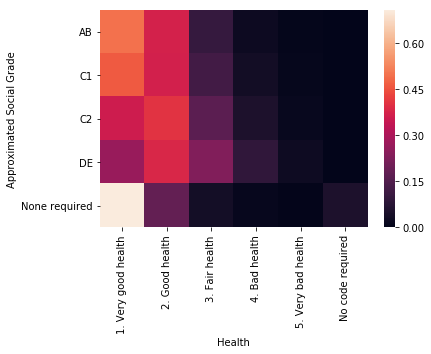

In [64]:
import seaborn
seaborn.heatmap(pd.crosstab(data["Approximated Social Grade"].map(social_codes),data["Health"].map(health_codes), normalize="index"))

## Task

In what part of the UK is unemployment worst?